<a id="header"></a>
# Part 4: levels 62-70

[Return home](../)

In [164]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

pd.options.display.max_rows = None

These last nine levels are truly the formative levels for Samurai. They add the fundamental traits and actions that give the job its complexity. Up to this point, most decision making was obvious and any alternate decision paths often led to virtually indistinguishable results under ideal conditions. The Kenki mechanic was relatively low pressure decision-making as it accumulated slowly and the choices for its spenders were rather limited. We'll see how this changes rapidly over the final leveling stretch.

## lvl 62-67

Level 62 is indeed a gamechanger. The trait Kenki Mastery II adds a Kenki bonus to almost every weaponskill (barring Iaijutsu), significantly increasing our Kenki accrual rate to 10 for combo finishers plus 5 for non finishers, or a net 55 Kenki per 8 GCD rotation (going through all Sen combos). This will net a substantial surplus if we reserve Kenki solely for Hissatsu: Kaiten -> Midare Setsugekka. Level 62 also grants the ability Hissatsu: Shinten, dealing 300 potency off the GCD at a cost of 25 Kenki on a 1s recast. This is significantly more value than spending on Hissatsu: Kaiten on Kasha/Gekko and only ~16.6% less value than spending Hissatsu: Kaiten on Midare Setsugekka (300 potency vs. 360 potency gain per 25 Kenki vs. 20 Kenki, respectively). In terms of potency per Kenki, it's 12 vs. 18 in favor of Hissatsu: Kaiten on Midare Setsugeka. Needless to say, if we're not saving for Hissatsu: Kaiten on Midare Setsugekka or for utility, we spend Kenki on Hissatsu: Shinten.

Level 66 grants the Starry Eyes ability... depending on its potency and Kenki cost, it may not be worth using at all when Hissatsu: Shinten is an option. On the other hand, if it does become worth it, it might encourage you to take damage so that you can use Third Eye and Starry Eyes...

With the increased Kenki generation, let's revisit our single target situations with the expectation of capping Kenki very early on.

### Example Hissatsu usage with Opener 1

In [165]:
sam = Samurai(kenki_mastery=True)

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Higanbana'), ('Gekko'), ('Hakaze'),
           ('Yukikaze'), ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka', 'Meikyo Shisui'), ('Gekko'), ('Yukikaze'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Shifu'),
           ('Higanbana'), ('Kasha'), ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Hakaze'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka', 'Meikyo Shisui'), ('Kasha'), ('Gekko'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Hakaze'), ('Shifu'), 
           ('Kasha'), ('Higanbana')]

In [166]:
df0, average_potency, pps = sam.parse_rotation(actions)
display(df0)

average potency per GCD = 487.523430769
average potency per second = 225.320129408


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,,400.000,False,True,False,0,10,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,20,980.000
4,8.88,Jinpu,,280.000,False,True,False,0,25,1260.000
5,11.04,Higanbana,,276.000,True,True,False,0,30,1536.000
6,13.20,Gekko,,493.327,True,True,False,1,30,2029.327
7,15.36,Hakaze,,205.827,True,True,False,1,40,2235.154
8,17.52,Yukikaze,,424.327,True,True,False,1,45,2659.481
9,19.68,Hakaze,,224.802,True,True,True,1,55,2884.283


As you can see, we capped Kenki less than a minute into the encounter. Let's add in Hissatsu: Shinten to dump some Kenki.

In [167]:
sam = Samurai(kenki_mastery=True)

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Higanbana'), ('Gekko'), ('Hakaze'),
           ('Yukikaze'), ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka', 'Meikyo Shisui'), ('Gekko'), ('Yukikaze'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Hakaze'),
           ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'), ('Hakaze'), ('Shifu'),
           ('Higanbana'), ('Kasha', 'Hissatsu: Shinten'), ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu', 'Hissatsu: Shinten'), ('Gekko'), ('Hakaze'), ('Yukikaze', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'), ('Hakaze'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka', 'Meikyo Shisui'), ('Kasha'), ('Gekko', 'Hissatsu: Shinten'),
           ('Yukikaze', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), 
           ('Kasha', 'Hissatsu: Shinten'), ('Higanbana')]

In [168]:
df1, average_potency, pps = sam.parse_rotation(actions)
display(df1)

average potency per GCD = 546.438815385
average potency per second = 252.549224972


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,,400.000,False,True,False,0,10,830.000
3,6.72,Hakaze,,150.000,False,True,False,0,20,980.000
4,8.88,Jinpu,,280.000,False,True,False,0,25,1260.000
5,11.04,Higanbana,,276.000,True,True,False,0,30,1536.000
6,13.20,Gekko,,493.327,True,True,False,1,30,2029.327
7,15.36,Hakaze,,205.827,True,True,False,1,40,2235.154
8,17.52,Yukikaze,,424.327,True,True,False,1,45,2659.481
9,19.68,Hakaze,,224.802,True,True,True,1,55,2884.283


Here I made the conscious effort to try to spend all the Kenki generated by the end. I haphazardly inserted Hissatsu: Shinten throughout whenever I was exceeding about 75 Kenki or so. In a vacuum, we have this flexibility of spending Kenki whenever especially with the 1s recast time on Hissatsu: Shinten. We could even use it every GCD for increased burst provided we have enough Kenki. 

Although a fairer comparison would have been to spend all the Kenki on Hissatsu: Kaiten for the first example, we observe a roughly 10% increase in potency per second from level 61 to level 62 just by acquiring Kenki Mastery II and Hissatsu: Shinten.

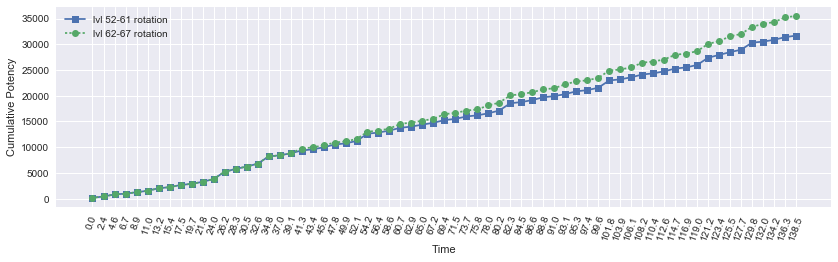

In [169]:
compare_potencies([df0, df1], ['lvl 52-61 rotation', 'lvl 62-67 rotation'])

The first 50 seconds or so are identical because I made the decision to not use Hissatsu: Shinten until I nearly capped on Kenki. Again, depending on encounter and party specifics, you may place your Shinten better; this freedom is facilitated by the flexibility of the Kenki gauge system.

### Example Hissatsu usage with AoE rotations

Hissatsu: Kyuten is learned at level 64 and is the AoE analog of Hissatsu: Shinten, matching it in potency at two targets. However, its value needs to be compared to spending Hissatsu: Kaiten on Tenka Goken. Hissatsu: Kyuten does 150 potency to all targets without AoE downscaling at the cost of 25 Kenki whereas Hissatsu: Kaiten increases the potency of the next weaponskill, in our case Tenka Goken, by 50% at the cost of 20 Kenki. Additionally, Tenka Goken experiences decreased potency per target as target numbers goes up. Let's see each compares as a function of number of targets.

In [170]:
dfs_aoe_kaiten_only = []
pps_aoe_kaiten_only = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai(kenki_mastery=True, kenki_gauge=50)
    
    actions = [('Fuga'), ('Oka'), ('Fuga'), ('Mangetsu', 'Hissatsu: Kaiten'), ('Tenka Goken'), 
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Oka', 'Hissatsu: Kaiten'), 
               ('Tenka Goken'), ('Fuga'), ('Mangetsu'), ('Fuga'),
               ('Oka', 'Hissatsu: Kaiten'), ('Tenka Goken')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_aoe_kaiten_only.append(df_temp)
    pps_aoe_kaiten_only.append(pps)
    
    labels.append('%s targets' % n_targets)
    print('\n')

display(dfs_aoe_kaiten_only[-1])

number of targets = 2
average potency per GCD = 437.2
average potency per second = 182.166666667


number of targets = 3
average potency per GCD = 627.6
average potency per second = 261.5


number of targets = 4
average potency per GCD = 799.2
average potency per second = 333.0


number of targets = 5
average potency per GCD = 952.0
average potency per second = 396.666666667


number of targets = 6
average potency per GCD = 1086.0
average potency per second = 452.5


number of targets = 7
average potency per GCD = 1220.0
average potency per second = 508.333333333




,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.0,Fuga,,700.0,False,False,False,0,50,700.0
1,2.4,Oka,,1000.0,False,False,False,0,55,1700.0
2,4.8,Fuga,,700.0,False,False,False,0,65,2400.0
3,7.2,Mangetsu,Hissatsu: Kaiten,1000.0,False,False,False,0,70,3400.0
4,9.6,Tenka Goken,,2700.0,False,False,False,0,60,6100.0
5,12.0,Fuga,,700.0,False,False,False,0,60,6800.0
6,14.4,Mangetsu,,1000.0,False,False,False,0,65,7800.0
7,16.8,Fuga,,700.0,False,False,False,0,75,8500.0
8,19.2,Oka,Hissatsu: Kaiten,1000.0,False,False,False,0,80,9500.0
9,21.6,Tenka Goken,,2700.0,False,False,False,0,70,12200.0


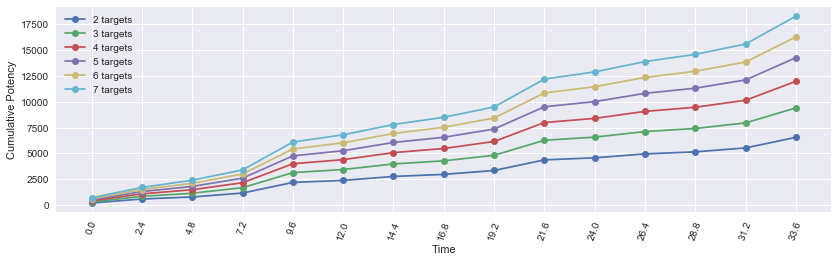

In [171]:
compare_n_potencies(dfs_aoe_kaiten_only, labels)

In [172]:
dfs_aoe_kyuten_only = []
pps_aoe_kyuten_only = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai(kenki_mastery=True, kenki_gauge=50)
    
    actions = [('Fuga'), ('Oka'), ('Fuga'), ('Mangetsu', 'Hissatsu: Kyuten'), ('Tenka Goken'), 
               ('Fuga'), ('Mangetsu'), ('Fuga'), ('Oka', 'Hissatsu: Kyuten'), 
               ('Tenka Goken'), ('Fuga', 'Hissatsu: Kyuten'), ('Mangetsu', 'Hissatsu: Kyuten'), ('Fuga'),
               ('Oka', 'Hissatsu: Kyuten'), ('Tenka Goken')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_aoe_kyuten_only.append(df_temp)
    pps_aoe_kyuten_only.append(pps)
    
    labels.append('%s targets' % n_targets)
    print('\n')

display(dfs_aoe_kyuten_only[-1])

number of targets = 2
average potency per GCD = 468.8
average potency per second = 195.333333333


number of targets = 3
average potency per GCD = 680.4
average potency per second = 283.5


number of targets = 4
average potency per GCD = 876.8
average potency per second = 365.333333333


number of targets = 5
average potency per GCD = 1058.0
average potency per second = 440.833333333


number of targets = 6
average potency per GCD = 1224.0
average potency per second = 510.0


number of targets = 7
average potency per GCD = 1390.0
average potency per second = 579.166666667




,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.0,Fuga,,700.0,False,False,False,0,50,700.0
1,2.4,Oka,,1000.0,False,False,False,0,55,1700.0
2,4.8,Fuga,,700.0,False,False,False,0,65,2400.0
3,7.2,Mangetsu,Hissatsu: Kyuten,2050.0,False,False,False,0,70,4450.0
4,9.6,Tenka Goken,,1800.0,False,False,False,0,55,6250.0
5,12.0,Fuga,,700.0,False,False,False,0,55,6950.0
6,14.4,Mangetsu,,1000.0,False,False,False,0,60,7950.0
7,16.8,Fuga,,700.0,False,False,False,0,70,8650.0
8,19.2,Oka,Hissatsu: Kyuten,2050.0,False,False,False,0,75,10700.0
9,21.6,Tenka Goken,,1800.0,False,False,False,0,60,12500.0


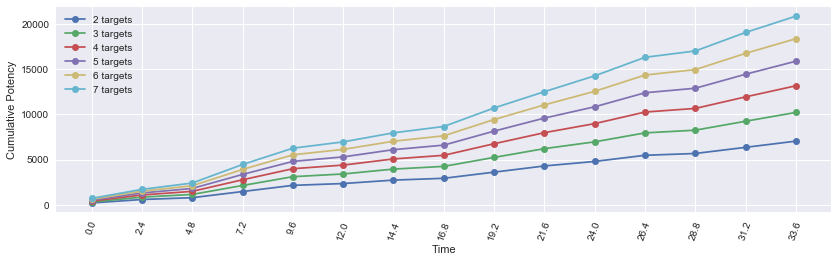

In [173]:
compare_n_potencies(dfs_aoe_kyuten_only, labels)

Now it would be downright wasteful to use Kenki on Hissatsu: Kaiten with Tenka Goken exclusively as we have a net surplus of Kenki so let's fill in the gaps with Hissatsu: Kyuten.

In [174]:
dfs_aoe_both = []
pps_aoe_both = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai(kenki_mastery=True, kenki_gauge=50)
    
    actions = [('Fuga'), ('Oka', 'Hissatsu: Kyuten'), ('Fuga'), ('Mangetsu', 'Hissatsu: Kaiten'), ('Tenka Goken'), 
               ('Fuga', 'Hissatsu: Kyuten'), ('Mangetsu'), ('Fuga'), ('Oka', 'Hissatsu: Kaiten'), 
               ('Tenka Goken'), ('Fuga', 'Hissatsu: Kyuten'), ('Mangetsu'), ('Fuga'),
               ('Oka', 'Hissatsu: Kaiten'), ('Tenka Goken')]
    
    print('number of targets = %s' % n_targets)
    df_temp, average_potency, pps = sam.parse_rotation(actions, n_targets=n_targets)
    dfs_aoe_both.append(df_temp)
    pps_aoe_both.append(pps)
    
    labels.append('%s targets' % n_targets)
    print('\n')

display(dfs_aoe_both[-1])

number of targets = 2
average potency per GCD = 497.2
average potency per second = 207.166666667


number of targets = 3
average potency per GCD = 717.6
average potency per second = 299.0


number of targets = 4
average potency per GCD = 919.2
average potency per second = 383.0


number of targets = 5
average potency per GCD = 1102.0
average potency per second = 459.166666667


number of targets = 6
average potency per GCD = 1266.0
average potency per second = 527.5


number of targets = 7
average potency per GCD = 1430.0
average potency per second = 595.833333333




,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.0,Fuga,,700.0,False,False,False,0,50,700.0
1,2.4,Oka,Hissatsu: Kyuten,2050.0,False,False,False,0,55,2750.0
2,4.8,Fuga,,700.0,False,False,False,0,40,3450.0
3,7.2,Mangetsu,Hissatsu: Kaiten,1000.0,False,False,False,0,45,4450.0
4,9.6,Tenka Goken,,2700.0,False,False,False,0,35,7150.0
5,12.0,Fuga,Hissatsu: Kyuten,1750.0,False,False,False,0,35,8900.0
6,14.4,Mangetsu,,1000.0,False,False,False,0,15,9900.0
7,16.8,Fuga,,700.0,False,False,False,0,25,10600.0
8,19.2,Oka,Hissatsu: Kaiten,1000.0,False,False,False,0,30,11600.0
9,21.6,Tenka Goken,,2700.0,False,False,False,0,20,14300.0


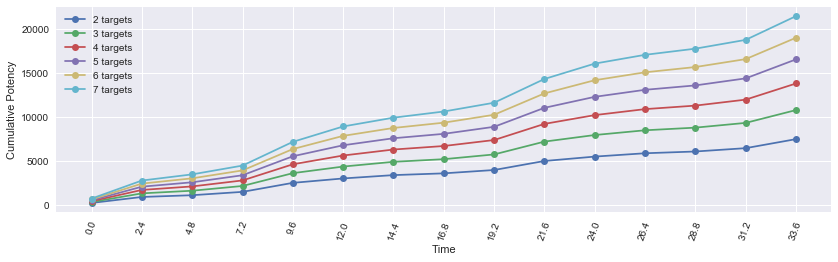

In [175]:
compare_n_potencies(dfs_aoe_both, labels)

In [176]:
potency_one_tenka = []
labels = []

n_target_range = range(2, 8)

for n_targets in n_target_range:
    sam = Samurai(kenki_mastery=True, kenki_gauge=50)
    sam.has_getsu = True
    sam.has_ka = True
    sam.has_hissatsu_kaiten = True
    
    df, _, _ = sam.parse_rotation([('Tenka Goken')], n_targets=n_targets)
    
    potency_one_tenka.append(df['Potency']/20)

average potency per GCD = 1026.0
average potency per second = 427.5
average potency per GCD = 1458.0
average potency per second = 607.5
average potency per GCD = 1836.0
average potency per second = 765.0
average potency per GCD = 2160.0
average potency per second = 900.0
average potency per GCD = 2430.0
average potency per second = 1012.5
average potency per GCD = 2700.0
average potency per second = 1125.0


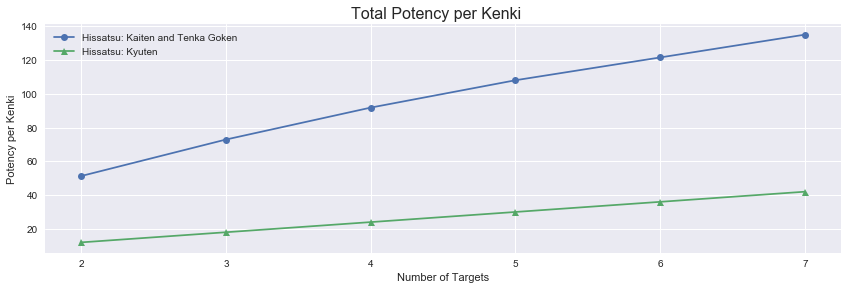

In [177]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,4))
fig.tight_layout(pad=2)

axes.plot(n_target_range, potency_one_tenka, '-o', label='Hissatsu: Kaiten and Tenka Goken')
axes.plot(n_target_range, [n*150/25 for n in n_target_range], '-^', label='Hissatsu: Kyuten')
axes.set_ylabel('Potency per Kenki')
axes.set_xlabel('Number of Targets')
axes.legend(loc='upper left', framealpha=0.5)

fig.suptitle('Total Potency per Kenki')

Expending Kenki on Hissatsu: Kaiten for Tenka Goken is the best bang for your buck, no question. When you only have enough Kenki for Hissatsu: Kaiten or Hissatsu: Kyuten, choose Hissatsu: Kaiten, hands down.

However, as we saw in the two previous examples, using Kenki exclusively on Hissatsu: Kyuten is extremely competitive with using Kenki on both. Additionally, it is superior to using Hissatsu: Kaiten exclusively. We can credit this to the minimal prerequisites for using Hissatsu: Kyuten; even though it costs more Kenki, you do not have to build Sen to use it, unlike Tenka Goken (with Hissatsu: Kaiten).

## Level 68-70

Level 68 is a pivotal shift in how Samurai plays. It grants you Hagakure, an ability on a short 40s that converts open Sen to Kenki at a 1 to 20 rate. Initially, this came as a headscratcher to many folks: why would I want to sacrifice muh Iaijutsu? Samurai post-50 has grown to be driven by Kenki more than Sen. The addition of powerful Kenki spenders like Hissatsu: Shinten and the level 70 capstone Hissatsu: Guren add significant potency to the Samurai rotation off the GCD. Iaijutsu, while powerful in their own right, "cost" a GCD and delay Kenki generation from the other weaponskills.

Consider Midare Setsugekka. At the cost of three Sen, it deals 720 potency unbuffed. If instead of using those three Sen on Iaijutsu, what if we used Hagakure to generate $3*20=60$ Kenki?

We could spend it on...
- Hissatsu: Guren, for 800+ potency for 50 Kenki.
- Hissatsu: Shinten (x2.4), for 720 potency for 60 Kenki.
- Hissatsu: Kyuten (x2.4), for burst AoE opportunities with even better payoff than Hissatsu: Shinten.

For the three Sen to Kenki conversion rate, we at least get our potency back if we spend on Hissatsu: Shinten exclusively. However, this payoff comes with the bonus of not requiring the GCD and cast time of Midare Setsugekka and letting us continue our weaponskill rotation sooner. A small gain is still a gain.

Hagakure obviously opens up a ton of opportunities. With its 40s recast time and Meikyo Shisui's 80s recast time, maybe there's some synergy there. Let's briefly explore some use cases of Hagakure. We'll delve into opener analysis and other advanced topics in the next section.

### Example Hagakure usage

In [178]:
sam = Samurai(kenki_mastery=True)

n_targets = 1

actions = [('Hakaze'), ('Shifu'), ('Kasha', 'Meikyo Shisui'), ('Jinpu'),
           ('Yukikaze', 'Hissatsu: Shinten'), ('Gekko', 'Hagakure'), ('Hakaze', 'Hissatsu: Guren'), ('Shifu', 'Hissatsu: Shinten'),
           ('Kasha', 'Hissatsu: Shinten'), ('Higanbana'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Yukikaze'), ('Hakaze'),
           ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'), ('Hakaze', 'Hissatsu: Shinten'),
           ('Jinpu'), ('Gekko'), ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha', 'Hagakure'), ('Hakaze', 'Hissatsu: Shinten'),
           ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'), ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'), ('Higanbana', 'Meikyo Shisui'),
           ('Kasha'), ('Gekko'), ('Yukikaze', 'Hissatsu: Kaiten'), ('Hakaze'),
           ('Shifu', 'Hagakure'), ('Kasha', 'Hissatsu: Shinten'), ('Hakaze'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'), ('Hakaze'),
           ('Yukikaze'), ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'), ('Hakaze'), ('Shifu', 'Hissatsu: Guren'), ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze')]

In [179]:
df2, average_potency, pps = sam.parse_rotation(actions)
display(df2)

average potency per GCD = 559.000976923
average potency per second = 258.355115899


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.0000,False,False,False,0,0,150.0000
1,2.40,Shifu,,280.0000,False,False,False,0,5,430.0000
2,4.56,Kasha,Meikyo Shisui,400.0000,False,True,False,0,10,830.0000
3,6.72,Jinpu,,280.0000,False,True,False,0,20,1110.0000
4,8.88,Yukikaze,Hissatsu: Shinten,773.9500,True,True,False,0,25,1883.9500
5,11.04,Gekko,Hagakure,510.6000,True,True,True,0,10,2394.5500
6,13.20,Hakaze,Hissatsu: Guren,1212.6750,True,True,True,0,80,3607.2250
7,15.36,Shifu,Hissatsu: Shinten,740.3700,True,True,True,0,35,4347.5950
8,17.52,Kasha,Hissatsu: Shinten,893.5500,True,True,True,0,15,5241.1450
9,19.68,Higanbana,,306.3600,True,True,True,0,0,5547.5050


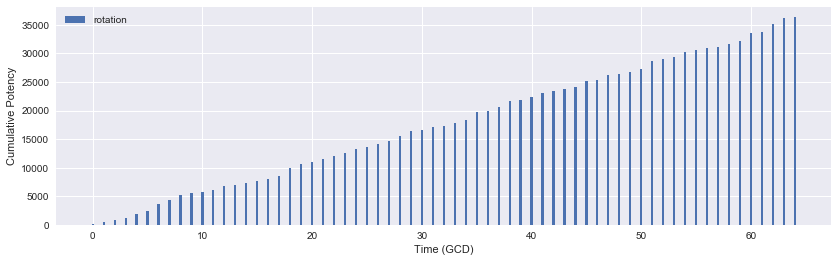

In [180]:
plot_potency(df2, truncate_actions=True)

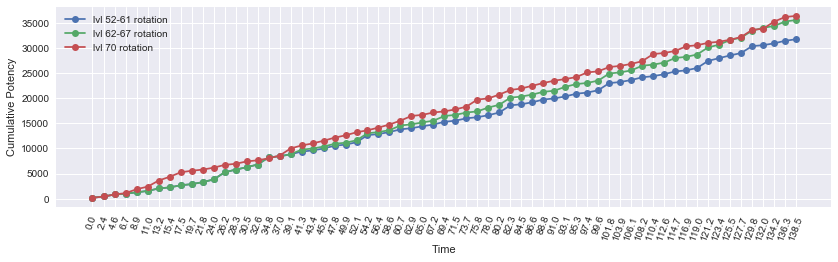

In [181]:
compare_n_potencies([df0, df1, df2], ['lvl 52-61 rotation', 'lvl 62-67 rotation', 'lvl 70 rotation'])

Here I used the first Meikyo Shisui to get buffs up and three Sen open ASAP. The first set of three Sen went to Hagakure; this was an attempt to synchronize Meikyo Shisui and Hagakure to rapidly generate 60 Kenki. Unfortunately, while the recast timers seem like logical matches, the Sen generation does not fall in line.

It takes eight GCDs to open three Sen from scratch. Depending on your base GCD, this is in the neighborhood of 16-19 seconds while Shifu is active. This gives us the opportunity to alternate spending three Sen on Midare Setsugekka and spending three Sen on Hagakure while keeping Hagakure on cooldown. Reapplying Higanbana will increase the period of this cycle. We have some flexibility in holding onto three Sen by using the fact that Iaijutsu doesn't break combo. Nevertheless, unless we reapply Higanbana every Hagakure cycle (significantly clipping it), it will be difficult to convert three Sen via Hagakure as soon as Hagakure comes off cooldown.

<a href="#header">back to the top...</a>